<a href="https://colab.research.google.com/github/HakankoksalAI/HakankoksalAI/blob/main/DL_EEG_Emotion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Add libraries**

In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import scipy
import tensorflow.compat.v2 as tf



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras as k

In [74]:
from google.colab import drive
drive.mount('/content/drive')
mrc_data=pd.read_csv('/content/drive/My Drive/emotions.csv')
print(mrc_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      

In [75]:
mrc_data.head(3)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.07,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.0,-162.0,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.55,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.6,-31.6,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.90,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.0,-148.0,281.00,POSITIVE


In [76]:
smp_data=mrc_data.loc[:,'fft_0_a':'fft_749_a']

In [77]:
smp_data.head(3)

,fft_0_a,fft_1_a,fft_2_a,fft_3_a,fft_4_a,fft_5_a,fft_6_a,fft_7_a,fft_8_a,fft_9_a,...,fft_740_a,fft_741_a,fft_742_a,fft_743_a,fft_744_a,fft_745_a,fft_746_a,fft_747_a,fft_748_a,fft_749_a
0,-520.0,398.0,-201.0,-201.0,398.0,-52.2,121.0,-64.0,-64.0,121.0,...,179.0,26.4,-12.9,-12.9,26.4,-474.0,442.0,-222.00,-222.00,442.0
1,66.2,-4.3,43.6,43.6,-4.3,66.0,-29.0,73.3,73.3,-29.0,...,184.0,17.0,-18.9,-18.9,17.0,189.0,-19.6,-8.37,-8.37,-19.6
2,-90.8,204.0,-77.1,-77.1,204.0,-488.0,415.0,-187.0,-187.0,415.0,...,-796.0,631.0,-261.0,-261.0,631.0,-86.4,176.0,-100.00,-100.00,176.0


<function matplotlib.pyplot.show(close=None, block=None)>

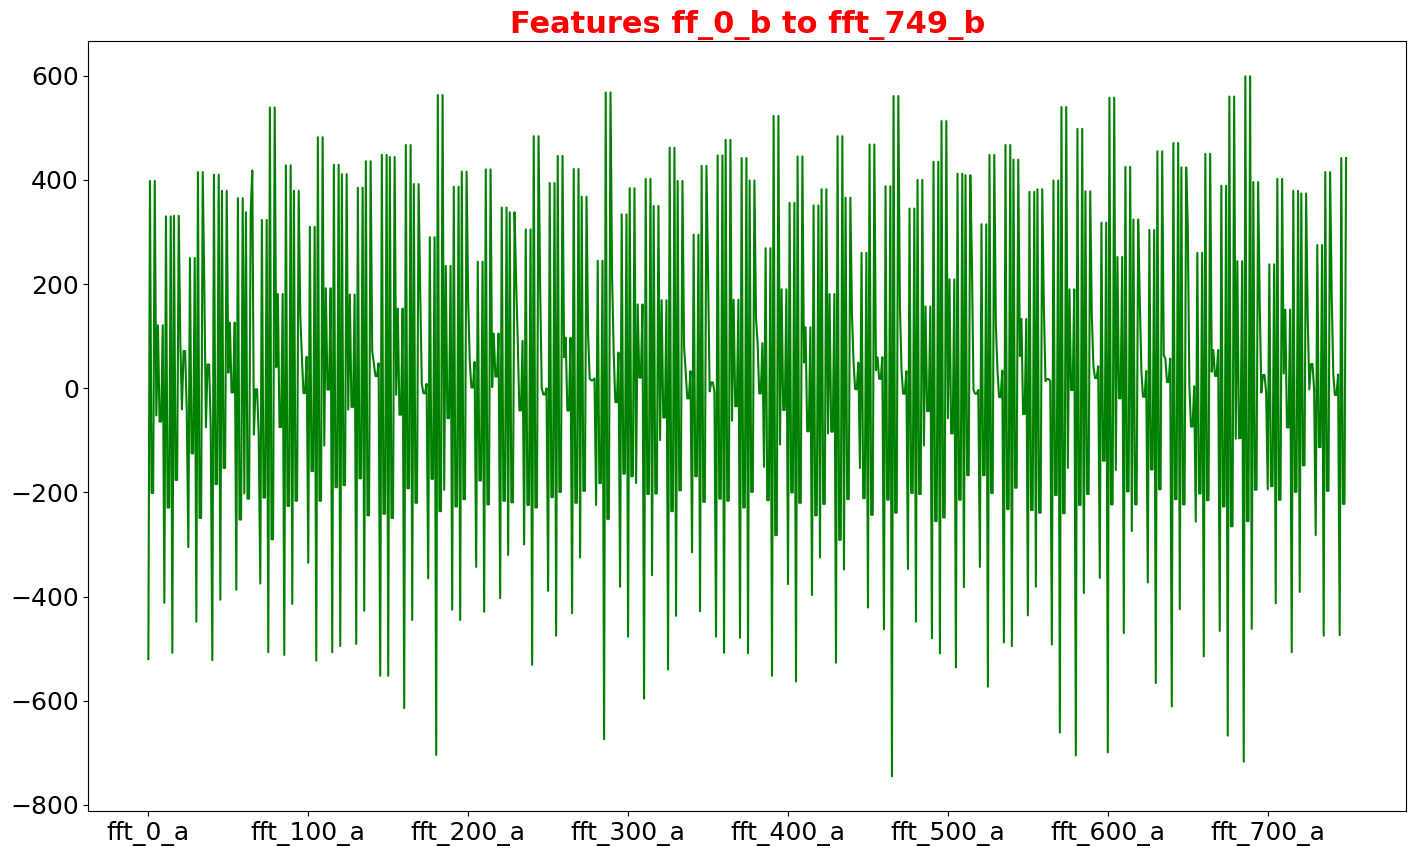

In [78]:
smp_data.iloc[0,:].plot(figsize=(17,10),fontsize=18,color='green')
plt.title("Features ff_0_b to fft_749_b",fontsize=22,color='red',fontweight='bold')

plt.show

In [79]:
# label classes
mrc_data['label'].value_counts()

,count
label,
NEUTRAL,716
NEGATIVE,708
POSITIVE,708


In [80]:
le=LabelEncoder()
mrc_data['label']=le.fit_transform(mrc_data['label'])


In [81]:
y=mrc_data.pop('label')
X=mrc_data

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=55)
X_train=np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
X_test=np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [83]:

from tensorflow.keras.layers import Dense, Flatten, Dropout,Activation,LSTM,ReLU,Reshape,Bidirectional,BatchNormalization,Input,concatenate,PReLU
inps=tf.keras.Input(shape=(X_train.shape[1],1))

gru=tf.keras.layers.GRU(256,return_sequences=True)(inps)
flt=Flatten()(gru)
out=Dense(3, activation='softmax')(flt)
model=tf.keras.Model(inps,out)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 2548, 256)           │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def train_model(model,X_train,  y_train,X_test,y_test,epoch=5):

        kadam=keras.optimizers.Adam(Learning_rat=0.001)
        es

